# Introduction
## Project Goal
We will analyze the data on clients of the telecom operator Interconnect to forecast their churn of clients. Our goal is to create a machine learning model that will predit clients who are likely to leave so that Interconnect will be able to offer these clients incentives to stay. Our machine learning task will involve binary classification. We will also explore features that may be associated with churn in order to make suggestions to the company on how to prevent churn.

## Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

## Initialization

In [141]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\abba\anaconda3\lib\site-packages (from xgboost) (1.22.4)



In [147]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [148]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import shuffle
import category_encoders as ce
import catboost as cb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import imblearn
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_val_score
from statistics import mean
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Load Data

In [149]:
try:
    personal_df = pd.read_csv('personal.csv')
    phone_df = pd.read_csv('phone.csv')
    internet_df = pd.read_csv('internet.csv')
    contract_df = pd.read_csv('contract.csv')
except:
    personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
    phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
    internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
    contract_df = pd.read_csv('/datasets/final_provider/contract.csv')

## Review Data

In [150]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [151]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [152]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [153]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [154]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


# Data Processing

## Merge Dataframes
There are four dataframes with information. We will merge these four dataframes into one dataframe to create a dataframe with features we can use to train a model to predict churn. Each dataframe has a customerID column. The personal_df has 7043 rows. The contract_df has 7043 rows.
We will merge these two dataframes and see how many customer IDs we will get if we merge the dataframes on customerID.

In [155]:
# Merging personal_df and contract_df to create df

df = pd.merge(personal_df, contract_df, on='customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 715.3+ KB


Now we will merge the phone_df and internet_df with the main df, one at a time. We will use indicator=True to create a column that indicates where each row in the dataframe originated.

In [156]:
# Merging df with phone_df

df = pd.merge(df, phone_df,  how="left", on='customerID', indicator=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 770.3+ KB


In [157]:
# Merging df with internet_df

df = pd.merge(df, internet_df,  how="left", on='customerID', indicator=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [158]:
# Reviewing df after merge
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No


We created a dataframe with all of the information on the customers with phone services and the customers with internet services, according to their customerID. Now we will process the data.

## Convert Columns to Lowercase

We will convert all column headers to lowercase format.

In [159]:
# Convert columns to lowercase

df.columns= df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   begindate         7043 non-null   object 
 6   enddate           7043 non-null   object 
 7   type              7043 non-null   object 
 8   paperlessbilling  7043 non-null   object 
 9   paymentmethod     7043 non-null   object 
 10  monthlycharges    7043 non-null   float64
 11  totalcharges      7043 non-null   object 
 12  multiplelines     6361 non-null   object 
 13  internetservice   5517 non-null   object 
 14  onlinesecurity    5517 non-null   object 
 15  onlinebackup      5517 non-null   object 
 16  deviceprotection  5517 non-null   object 


## Check for duplicates

In [160]:
# Checking df for duplicate rows

df.duplicated().value_counts()

False    7043
dtype: int64

## Missing Values

In [161]:
# Checking for missing values

df.isnull().sum()

customerid             0
gender                 0
seniorcitizen          0
partner                0
dependents             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
multiplelines        682
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
dtype: int64

There are missing values after merging the phone and internet dataframes with the personal and contract dataframes. We will check the values in the columns with missing values to determine how to fill these missing values.

In [162]:
# Checking the values of df['MultipleLines']

df['multiplelines'].value_counts()

No     3390
Yes    2971
Name: multiplelines, dtype: int64

There are 682 customers that lack information about their phone service. The filled in values are either yes or no. We might assume that if there is a missing value it is because the customer lacked phone service, and fill missing values with "no". The missing value occurred because we merged the phone data and internet data on a list of customers. We will fill in the missing values with "no".

Likewise, there are 1526 customers that lack information about their internet service. Let's check the values in these columns.

In [163]:
# Checking the values of df['internetservice']

df['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
Name: internetservice, dtype: int64

Similarly, there are 1526 customers missing information about their internet services. The filled in values are either yes or no. We might assume that if there is a missing value it is because the customer lacked any internet services, and fill missing values with "no". We will fill in the missing values with "no".

In [164]:
# Converting rows with NaN values to "No"

df['multiplelines'] = df['multiplelines'].fillna("No")
df['internetservice'] = df['internetservice'] .fillna("None")
df['onlinesecurity'] = df['onlinesecurity'].fillna("No")
df['onlinebackup'] = df['onlinebackup'].fillna("No")
df['deviceprotection'] = df['deviceprotection'].fillna("No")
df['techsupport'] = df['techsupport'].fillna("No")
df['streamingtv'] = df['streamingtv'].fillna("No")
df['streamingmovies'] = df['streamingmovies'].fillna("No")

## Converting Data Types
We will analyze each column to see if and how to convert the data type.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   begindate         7043 non-null   object 
 6   enddate           7043 non-null   object 
 7   type              7043 non-null   object 
 8   paperlessbilling  7043 non-null   object 
 9   paymentmethod     7043 non-null   object 
 10  monthlycharges    7043 non-null   float64
 11  totalcharges      7043 non-null   object 
 12  multiplelines     7043 non-null   object 
 13  internetservice   7043 non-null   object 
 14  onlinesecurity    7043 non-null   object 
 15  onlinebackup      7043 non-null   object 
 16  deviceprotection  7043 non-null   object 


### Converting to Datetime Types

In [166]:
# Checking dates in the df['begindate'] before converting to datetime type

df['begindate'].sort_values()

4513    2013-10-01
4610    2013-10-01
3439    2013-10-01
975     2013-11-01
3040    2013-11-01
           ...    
3331    2020-02-01
6670    2020-02-01
936     2020-02-01
3826    2020-02-01
6754    2020-02-01
Name: begindate, Length: 7043, dtype: object

The dates range from October 2013 to February 2020. 

In [167]:
# Converting 'begindate' to datetime type

df['begindate'] = pd.to_datetime(df['begindate'], format="%Y-%m-%d")
df['begindate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: begindate
Non-Null Count  Dtype         
--------------  -----         
7043 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 110.0 KB


In [168]:
# Checking dates in the df['enddate']

df['enddate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: enddate, dtype: int64

## Feature Engineering 'Churn' Column

The 'No' in 'enddate' prevents the column from being converted to a datetime type.

We will use 'enddate' to create a new column called churn with 0= no churn, and 1=churn. The string 'no' in the 'enddate' column means the customer is still active and there is no churn for that customer. For the purpose of model training it does not matter when the customer ended the service. As long as there is any date for 'enddate' the result is the same, the client has cancelled the service. So we will create an additional column 'churn' using the values in 'enddate' with 0 for a 'no' response and 1 if there is any enddate, so that 1 indicates customer churn.

In [169]:
# Creating a new column 'churn', replacing all strings that do not equal "0" (meaning 'no') with "1" and that equal "0" with "0"

df['churn'] = np.where(df['enddate'] != "No", '1', '0')

In the 'cancelled', customers who cancelled = 1, and customers who remain = 0.

In [170]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [171]:
df['enddate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: enddate, dtype: int64

We will now extract the datetime data from 'enddate' to create a new column 'endterm' to calculate customer longevity. We will use the maximum date in the data for customers who did not cancel, so that we can calculate their longevity.

## Feature Engineering 'Endterm' Column as Datetime Type

We will create an artificial enddate for active customers using the last date in the data so that we can use these values to determine a customer's longevity whether they cancelled or not. This information will be stored in a new column 'endterm'.

In [172]:
df['endterm'] = df['enddate']
df['endterm'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: endterm, dtype: int64

In [173]:
df['endterm'] = df['enddate']
df['endterm'] = df['endterm'].replace(['No'], '2020-02-01')
df['endterm'].value_counts()

2020-02-01             5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: endterm, dtype: int64

In [174]:
# Converting 'begindate' to datetime type

df['endterm'] = pd.to_datetime(df['endterm'], format="%Y-%m-%d")
df['endterm'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: endterm
Non-Null Count  Dtype         
--------------  -----         
7043 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 110.0 KB


### Feature Engineering 'Longevity' Column by Months

We will create a new column 'longevity' calculating a customer's term in months using the datetime data.

In [175]:
df['longevity'] = ((df.endterm - df.begindate)/np.timedelta64(1, 'M'))

In [176]:
df['longevity'] = df['longevity'].astype(int)

In [177]:
df['longevity'].describe()

count    7043.000000
mean       32.166832
std        24.529822
min         0.000000
25%         8.000000
50%        29.000000
75%        55.000000
max        71.000000
Name: longevity, dtype: float64

In [178]:
# Creating a function to plot distributions
 
def hist_plot(data, column):
        fig, ax = plt.subplots(1, 1)
        ax.hist(data[column], bins=10)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('frequency')
        plt.show()

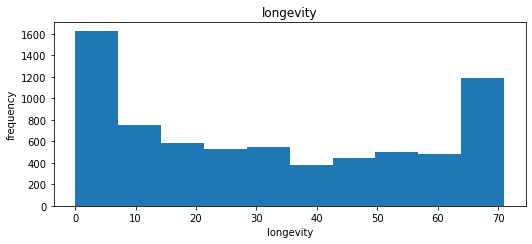

In [179]:
# Plotting the distribution of 'type'
hist_plot(df, 'longevity')

Customer longevity ranges from 0-71 months, with the majority of customers divided between new and long-time customers. Around 1600 customers are new, averaging around 0-5 months. Around 1200 customers are long-time, averaging 65-70 months terms.

## Analyzing Columns in Dataframe

There are different types of columns. Some columns contain values in object form that can be converted to integer, which will improve model training. We will investigate each column and convert values to 0 and 1 where possible. Some columns contain integer values but they need to be converted from an object type to integer type.

In [180]:
# View data types for each column
df.dtypes

customerid                  object
gender                      object
seniorcitizen                int64
partner                     object
dependents                  object
begindate           datetime64[ns]
enddate                     object
type                        object
paperlessbilling            object
paymentmethod               object
monthlycharges             float64
totalcharges                object
multiplelines               object
internetservice             object
onlinesecurity              object
onlinebackup                object
deviceprotection            object
techsupport                 object
streamingtv                 object
streamingmovies             object
churn                       object
endterm             datetime64[ns]
longevity                    int32
dtype: object

In [181]:
df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

We will replace the gender labels with numerical values so we can calculate correlations.

In [182]:
# Replacing gender labels with numerical values
df = df.replace({'Male':'0',
            'Female':'1'})

In [183]:
df['seniorcitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: seniorcitizen, dtype: float64

In [184]:
df['partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: partner, dtype: float64

In [185]:
df['dependents'].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: dependents, dtype: float64

In [186]:
df['type'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: type, dtype: float64

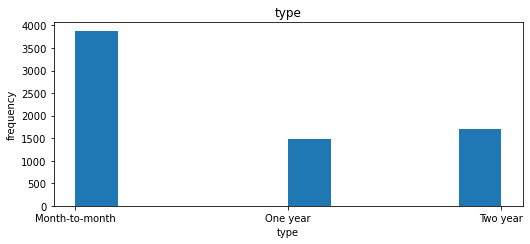

In [187]:
# Plotting the distribution of 'type'
hist_plot(df, 'type')

There are three type of plans: one-year (21%), month-to-month (55%), and two-year (24%) plans. The month-to-month plan is the most popular.

In [188]:
df['paperlessbilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: paperlessbilling, dtype: float64

In [189]:
df['paymentmethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: paymentmethod, dtype: float64

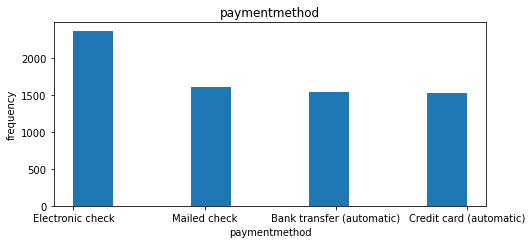

In [190]:
# Plotting the distribution of 'paymentmethod'
hist_plot(df, 'paymentmethod')

Out of the four payment methods, electronic check is the most popular method.

In [191]:
df['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

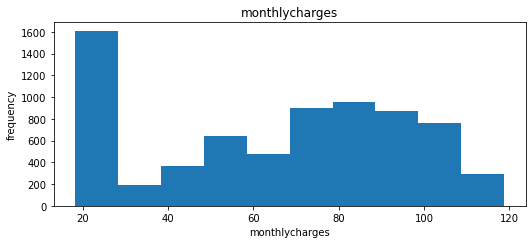

In [192]:
# Plotting the distribution of 'monthlycharges'
hist_plot(df, 'monthlycharges')

There is a range of monthly charges among customers. Monthly charges range from 18.25 to 118.75, with an average of 70.35. A high percentage of customers pay low charges every month, with the remaining customers evenly distributed from low to high monthly payments.

In [193]:
df['totalcharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

There are 11 charges missing in 'totalcharges'. We will fill these in by multiplying monthlycharges by the longevity, which is the number of months of a customer's term.

In [194]:
df['totalcharges']= df['monthlycharges'] * df['longevity']

In [195]:
df['totalcharges'].describe()

count    7043.000000
mean     2264.884261
std      2256.976408
min         0.000000
25%       393.075000
50%      1386.000000
75%      3779.475000
max      8431.250000
Name: totalcharges, dtype: float64

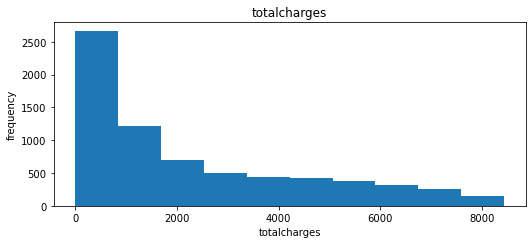

In [196]:
# Plotting the distribution of 'totalcharges'
hist_plot(df, 'totalcharges')

Most customer have low total charges, with a min of 0, a max of 8431, and an average of 1386.

In [197]:
df['multiplelines'].value_counts()

No     4072
Yes    2971
Name: multiplelines, dtype: int64

In [198]:
df['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internetservice, dtype: int64

In [199]:
df['onlinesecurity'].value_counts()

No     5024
Yes    2019
Name: onlinesecurity, dtype: int64

In [200]:
df['onlinebackup'].value_counts()

No     4614
Yes    2429
Name: onlinebackup, dtype: int64

In [201]:
df['deviceprotection'].value_counts()

No     4621
Yes    2422
Name: deviceprotection, dtype: int64

In [202]:
df['techsupport'].value_counts()

No     4999
Yes    2044
Name: techsupport, dtype: int64

In [203]:
df['streamingtv'].value_counts()

No     4336
Yes    2707
Name: streamingtv, dtype: int64

In [204]:
df['streamingmovies'].value_counts()

No     4311
Yes    2732
Name: streamingmovies, dtype: int64

Based on our analysis, we can convert the columns where there are Yes and No values to integeers to enable effective machine learning.

In [205]:
# Replace 'No' with 0 and 'Yes' with 1 in the dataframe
df = df.replace({'No':'0',
            'Yes':'1'})

In [206]:
# Converting data to integer type
df.gender = df.gender.astype('int64')
df.partner = df.partner.astype('int64')
df.dependents  = df.dependents .astype('int64')
df.paperlessbilling = df.paperlessbilling.astype('int64')
df.multiplelines = df.multiplelines.astype('int64')
df.onlinesecurity = df.onlinesecurity.astype('int64')
df.deviceprotection = df.deviceprotection.astype('int64')
df.techsupport = df.techsupport .astype('int64')
df.streamingtv = df.streamingtv.astype('int64')
df.onlinebackup = df.onlinebackup.astype('int64')
df.streamingmovies = df.streamingmovies.astype('int64')
df.churn= df.churn.astype('int64')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   int64         
 2   seniorcitizen     7043 non-null   int64         
 3   partner           7043 non-null   int64         
 4   dependents        7043 non-null   int64         
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   object        
 7   type              7043 non-null   object        
 8   paperlessbilling  7043 non-null   int64         
 9   paymentmethod     7043 non-null   object        
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  multiplelines     7043 non-null   int64         
 13  internetservice   7043 non-null   object        
 14  onlinesecurity    7043 n

# Exploratory Data Analysis

We will explore correlations between the features. We will also compare customers who did or did not churn based on certain features that could relate to churn.

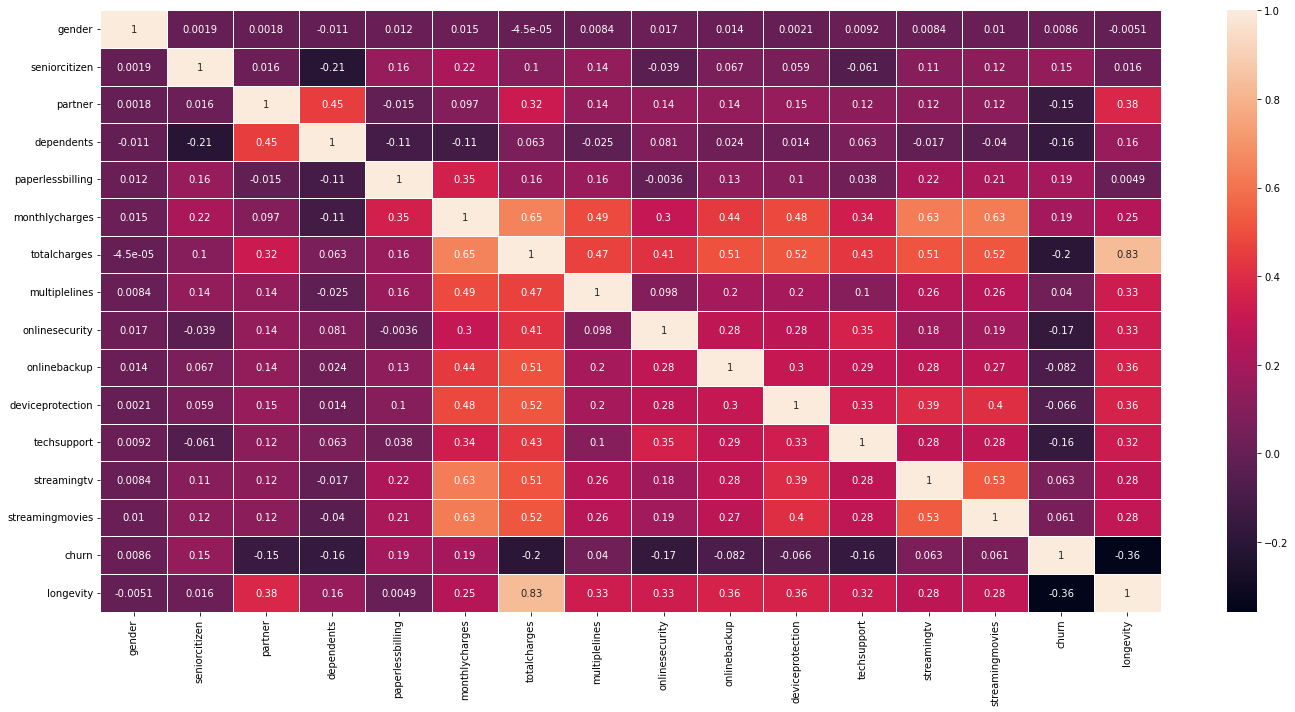

In [208]:
# Plotting correlations for numerical features included in the data

correlation_mat = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax)
plt.show()

In this heatmap displaying the correlations between different features, we see that longevity and total charges (0.83) are highly correlated. This makes sense since the more months a customer has a service, the higher the total charges would be. We will therefore drop 'totalcharges' before training the machine learning model to avoid collinearity. Likewise, streamingtv (0.63) and streamingmovies (0.63) are correlated with monthlycharges, since these two services are expensive and should correlate with a higher monthly charge. Churn is not significantly correlated with any feature so we will need to include a combination of the features in the machine learning model. Churn is moderately negatively correlated with longevity (-0.36), so that the longer a customer remains, the less likely the customer is to churn.

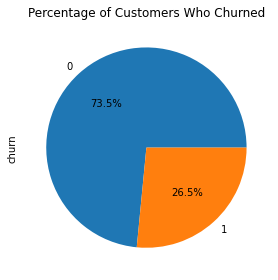

In [209]:
# Exploring percentage of customers who churned

df['churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(4,4));
plt.title("Percentage of Customers Who Churned")
plt.show()

We will compare these two classes of customers based on various features.

In [210]:
# Dividing 'churn' into groups of customers

churn = df.loc[df['churn'] == 1]
no_churn = df.loc[df['churn'] == 0]

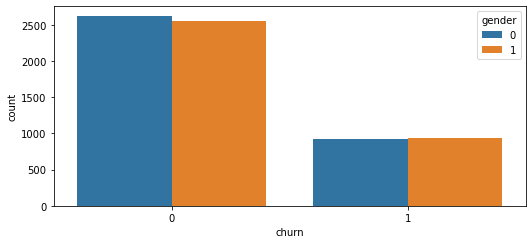

In [211]:
sns.countplot("churn", data=df,hue="gender")
plt.show()

Gender distribution is the same for churn and no churn customers, so we will drop gender from the dataframe.

In [212]:
churn['type'].value_counts(normalize=True)

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: type, dtype: float64

In [213]:
no_churn['type'].value_counts(normalize=True)

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: type, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

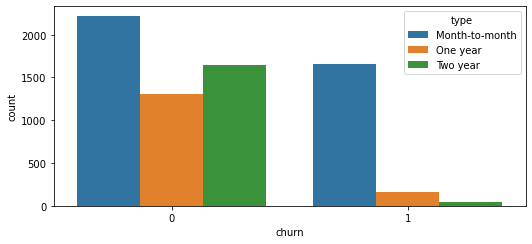

In [214]:
sns.countplot("churn", data=df,hue="type")

Customers who churned had a higher percentage of number of month-to-month contracts, 88%, compared to no_churn customers where 43% had month-to-month contracts.

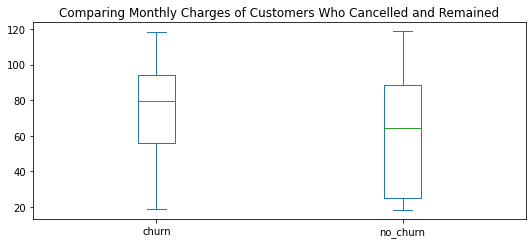

In [215]:
# Plotting box plots comparing monthly charges

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"churn": churn['monthlycharges'], "no_churn": no_churn['monthlycharges']})

# Plot the dataframe
ax = data[['churn', 'no_churn']].plot(kind='box', title='Comparing Monthly Charges of Customers Who Cancelled and Remained')

# Display the plot
plt.show()

We can see from the boxplots side by side that the range and the average monthly charge of customers who cancelled was higher than for customers who remained.

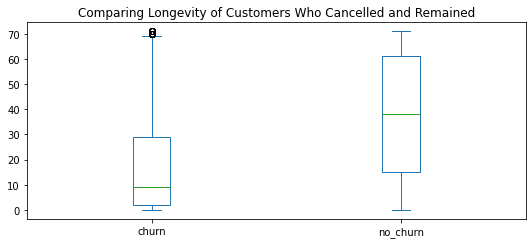

In [216]:
# Plotting box plots comparing longevity

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"churn": churn['longevity'], "no_churn": no_churn['longevity']})

# Plot the dataframe
ax = data[['churn', 'no_churn']].plot(kind='box', title='Comparing Longevity of Customers Who Cancelled and Remained')

# Display the plot
plt.show()

In [217]:
churn['longevity'].describe()

count    1869.000000
mean       17.588015
std        19.489864
min         0.000000
25%         2.000000
50%         9.000000
75%        29.000000
max        71.000000
Name: longevity, dtype: float64

Based on the side by side boxplots, we can see that customers who cancelled were fairly new customers. They averaged less than a 10 month longevity compared to customers who remained, who averaged around a 40 month longevity.

We can see there are outliers for customers who had high longevity and cancelled. Let's explore if we should eliminate these outliers.

We will apply a function for eliminating outliers to the 'longevity' feature in the df to eliminate outliers equally across churn and no_churn customers.

In [218]:
# Creating function for eliminating outliers

def outliers(df, column):
        
        #finding Q1 and Q2
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
       
        #finding the IQR
        IQR = Q3-Q1
        
        #finding the upper and lower limit
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR
        
        #finding outliers
        df[column > upper_limit]
        df[column < lower_limit]
        
        #trimming
        df = df[column < upper_limit] 
        df = df[column > lower_limit]
    
        return df.info() 

In [219]:
# Eliminating outliers

outliers(df, df['longevity']) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   int64         
 2   seniorcitizen     7043 non-null   int64         
 3   partner           7043 non-null   int64         
 4   dependents        7043 non-null   int64         
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   object        
 7   type              7043 non-null   object        
 8   paperlessbilling  7043 non-null   int64         
 9   paymentmethod     7043 non-null   object        
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  multiplelines     7043 non-null   int64         
 13  internetservice   7043 non-null   object        
 14  onlinesecurity    7043 n

Even though there are outliers within the churn classes, we did not drop any customers based on longevity since there were no significant outliers within the longevity feature overall. Dropping outliers for only customers with churn could bias the data.

In [220]:
churn['paymentmethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: paymentmethod, dtype: float64

In [221]:
no_churn['paymentmethod'].value_counts(normalize=True)

Mailed check                 0.252029
Electronic check             0.250097
Credit card (automatic)      0.249324
Bank transfer (automatic)    0.248550
Name: paymentmethod, dtype: float64

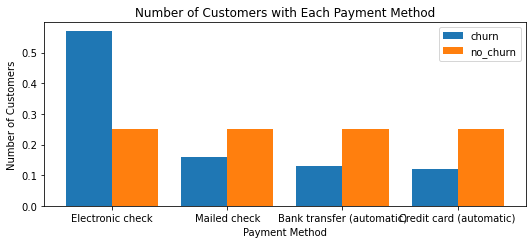

In [222]:
# Comparing 'paymentmethod' of customers based on 'cancelled'

X = ['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)']
churn = [0.57, 0.16, 0.13, 0.12]
no_churn = [0.25, 0.25, 0.25, 0.25]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn, 0.4, label = 'churn')
plt.bar(X_axis + 0.2, no_churn, 0.4, label = 'no_churn')
  
plt.xticks(X_axis, X)
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Number of Customers with Each Payment Method")
plt.legend()
plt.show()

Based on this barplot of the differences of payment method between customers who churned and did not churn, customers who churned were much more likely to pay by electronic check. At the same time, customers who remained were slightly more likely to pay be mailed check than customers who cancelled. We will explore if there is a connection between paying by electronic check and cancelling since more than half of customers who cancelled paid by electronic check. Let's see if this is related to paperless billing.

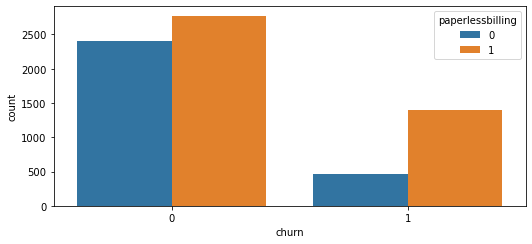

In [223]:
sns.countplot("churn", data=df,hue="paperlessbilling")
plt.show()

It looks like customers receiving paper bills was not a factor in cancellation since customers who cancelled were more likely to have paperless billing than customers who remained. It may be that electronic check was associated with churn because it is not an automatic payment and customers see their monthly invoice which may remind them of how much they are paying and motivate them to cancel.

# Preparation for Model Training

We will drop certain columns before model training: 'customerid', 'merge_phone' and 'merge_internet' are unnecessary for machine learning.
Datetime columns are unnecessary since our target is customer churn and the exact 'begindate' and 'enddate' or 'endterm' is unimportant.
We will drop 'gender' since it was not found to be different based on churn.
We also need to drop features that have collinearity. For example 'totalcharges' results from 'monthlycharges' and 'longevity' so we will drop 'totalcharges'. Likewise 'type' (which is month-to-month, one-year, or two-year) correlates with 'longevity' so we will drop 'type'.

In [224]:
# Dropping columns not needed for machine learning

df_final = df.drop(['customerid', 'gender', 'enddate', 'begindate', 'endterm', 'totalcharges', 'type'], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7043 non-null   int64  
 1   partner           7043 non-null   int64  
 2   dependents        7043 non-null   int64  
 3   paperlessbilling  7043 non-null   int64  
 4   paymentmethod     7043 non-null   object 
 5   monthlycharges    7043 non-null   float64
 6   multiplelines     7043 non-null   int64  
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   int64  
 9   onlinebackup      7043 non-null   int64  
 10  deviceprotection  7043 non-null   int64  
 11  techsupport       7043 non-null   int64  
 12  streamingtv       7043 non-null   int64  
 13  streamingmovies   7043 non-null   int64  
 14  churn             7043 non-null   int64  
 15  longevity         7043 non-null   int32  
dtypes: float64(1), int32(1), int64(12), object

After data preprocessing, the final dataframe has 16 columns and 7043 rows.

# Model Training

We will train different models with various hyperparameters. First we prepare the data for model training by assigning the features and target. We will then split the data into a 3 sets for training, validation and testing the final model. We use a linear regression as a baseline model. We will then build several models including a decision tree with hyperparameter tuning, a random forest with hyperparameter tuning, XGBoost, LightGBM, and CatBoost. We will use GridSearchCV to tune hyperparameters and analyze the AUC_ROC and F1 scores of the models to determine the best model and use this for our test set.

## Preparing Data for Model Training  <a class="anchor" id="section_1_1"></a>

### Converting Objects to Category Type

In [225]:
# Converting objects to categorical type

df_final['paymentmethod'] = df_final.paymentmethod.astype('category')
df_final['internetservice'] = df_final.internetservice.astype('category')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   seniorcitizen     7043 non-null   int64   
 1   partner           7043 non-null   int64   
 2   dependents        7043 non-null   int64   
 3   paperlessbilling  7043 non-null   int64   
 4   paymentmethod     7043 non-null   category
 5   monthlycharges    7043 non-null   float64 
 6   multiplelines     7043 non-null   int64   
 7   internetservice   7043 non-null   category
 8   onlinesecurity    7043 non-null   int64   
 9   onlinebackup      7043 non-null   int64   
 10  deviceprotection  7043 non-null   int64   
 11  techsupport       7043 non-null   int64   
 12  streamingtv       7043 non-null   int64   
 13  streamingmovies   7043 non-null   int64   
 14  churn             7043 non-null   int64   
 15  longevity         7043 non-null   int32   
dtypes: category(2), float64(

In [226]:
# Encoding categorical features using drop first to avoid collinearity or dummy trap

cat_features = ['paymentmethod', 'internetservice']

df_final_encoded = pd.get_dummies(df_final, columns=cat_features, drop_first=True)

### Checking for Class Imbalance  <a class="anchor" id="section_1_1"></a>

Our goal is to predict which customers will leave based on the behavior of customers with similar features. We will assign 'churn' as our target variable and train our model to predict whether or not a customer cancelled. 

In [227]:
# We will assign 'churn' as the target variable, the feature we need to predict, and the remaining attributes as the features.
 
X = df_final_encoded.drop(['churn'], axis=1)
y = df_final_encoded['churn']
 
print(X.shape)
print(y.shape)

(7043, 18)
(7043,)


Before we train our model, we need to know the class distribution of 'churn'.

In [228]:
# Checking the percentages of df['churn'] values

df_final_encoded['churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

There is a class imbalance in the target column. "0" is 72% and "1" 26%, around 3:1 ratio. We will address this class imbalance.

### Splitting the Dataframe 3-Way <a class="anchor" id="chapter1"></a>

First we will start with the source data and split it into three parts: training, validation, and test. This way, we can compare three models and use the test set for the final evaluation of the best model. We will leave as much data for the training as possible but make the sizes of the validation set and the test set equal. This will give us a source data split into a 3:1:1 ratio or  60% training, 20% validation, and 20% testing. 

In [229]:
# Splitting the data using indexing twice to create a 3:1:1 split for training, validation, and testing.
# We will use valid sets for model training and test set for the final model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12345, shuffle=True)

### Standardize the Data  <a class="anchor" id="section_1_1"></a>
We will scale the features in the training data using standard scaler so that features with higher values do not get unnecessary weighting during the model training.

In [230]:
# Standardizing the data

numeric = ['monthlycharges', 'longevity']
  
scaler = StandardScaler()
scaler.fit(X_train[numeric]) 
pd.options.mode.chained_assignment = None
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric]= scaler.transform(X_test[numeric])

### Upsampling using SMOTE to Address Class Imbalance

We will only resample the train set data so that the validation and test sets are representative of the real world data which has a class imbalance.

In [231]:
# Using SMOTE to Oversample the data
    
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 12345)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Logistic Regression<a class="anchor" id="chapter1"></a>

Since this is a binary classification problem, we will initially train a model using LogisticRegression and use this for our baseline model.

In [232]:
# Developing a model with LogisticRegression

lr_model =  LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
lr_model = lr_model.fit(X_train_resampled, y_train_resampled)
y_pred = lr_model.predict(X_valid)

probabilities_valid = lr_model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print('Logistic Regression scores:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_valid, y_pred))

Logistic Regression scores:
AUC-ROC score: 0.8121847905399604
F1: 0.5817307692307693


Now, we will train different models and compare the models to the LogisticRegression model to find the best model.

### DecisionTreeClassifier Model <a class="anchor" id="section_1_1"></a>

In [233]:
# Developing a model with DecisionTreeClassifier
 
best_model = None
best_result = 0

for depth in range(1, 10):
    dtc_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    dtc_model.fit(X_train_resampled, y_train_resampled)
    
    predictions_valid = dtc_model.predict(X_valid)
    result = roc_auc_score(y_valid, predictions_valid)
    if result > best_result:
        best_model = dtc_model
        best_result = result
        
print("max_depth =", depth)
probabilities_valid = dtc_model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print('Decision Tree Classifier scores:')
print('AUC-ROC score:',auc_roc)
print("F1 score of the best model on the validation set:", best_result)

max_depth = 9
Decision Tree Classifier scores:
AUC-ROC score: 0.7607855288007555
F1 score of the best model on the validation set: 0.7404672611382951


### RandomForest Classifier <a class="anchor" id="chapter1"></a>

In [234]:
# Developing a model with RandomForestClassifier
 
best_score = 0
best_est = 0
for est in range(1, 11): # choose hyperparameter range
    rfc_model = RandomForestClassifier(random_state=12345, n_estimators= est) 
    rfc_model.fit(X_train_resampled, y_train_resampled)
    
    predictions = rfc_model.predict(X_valid)
    score = roc_auc_score(y_valid, predictions)
    if score > best_score:
        best_score = score 
        best_est = est
        
probabilities_valid = rfc_model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print('Random Forest Classifier scores:')
print('AUC-ROC score:',auc_roc)
print("F1 of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Random Forest Classifier scores:
AUC-ROC score: 0.7809723474117949
F1 of the best model on the validation set (n_estimators = 9): 0.6985081873980599


### XGB Model

In [235]:
# Developing a model with XGBClassifier

XGB_model = XGBClassifier(learning_rate= 0.3,max_depth = 15,n_estimators = 500)
XGB_model.fit(X_train_resampled, y_train_resampled)
y_pred = XGB_model.predict(X_valid)


probabilities_valid = lr_model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print('XGB Classifier scores:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_valid, y_pred))

XGB Classifier scores:
AUC-ROC score: 0.8121847905399604
F1: 0.5403899721448469


### LightGBM Model <a class="anchor" id="section_1_1"></a>

In [236]:
# Building the lightGBMClassifier model

lgb_model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = lgb_model.predict(X_valid)

probabilities_valid = lr_model.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print('XGB Classifier scores:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_valid, y_pred))

XGB Classifier scores:
AUC-ROC score: 0.8121847905399604
F1: 0.582109479305741


### Catboost Model <a class="anchor" id="section_1_1"></a>

In [237]:
# Developing a CatBoostClassifier model

categorical_features = list(df_final.select_dtypes(include=['object']).columns.values.tolist())

#clf = CatBoostClassifier(iterations=100, cat_features=categorical_features, metric_period=50)
clf = CatBoostClassifier(iterations=100, cat_features=categorical_features, metric_period=50, verbose=False, random_state=12345, scale_pos_weight=3)

clf.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid),
          use_best_model=True, 
          cat_features=categorical_features)
y_pred = clf.predict(X_valid)


probabilities_valid = clf.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print('CatBoost Classifier scores:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_valid, y_pred))

CatBoost Classifier scores:
AUC-ROC score: 0.8355880869602542
F1: 0.5888888888888889


### Developing CatBoost model using best parameters from GridSearchCV
Since CatBoost was the best model so far, we will tune hyperparameters of CatBoost using GridSearchCV. We will use a pipeline so that the data is resampled within each fold separately.

In [238]:
from imblearn.pipeline import Pipeline as imbpipeline

clf = CatBoostClassifier(iterations=100, cat_features=categorical_features, metric_period=50, verbose=False)

pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=12345)],
    ("estimator", clf )
])


In [239]:
param_grid = {
    "estimator__depth": [4, 5, 6],
    "estimator__iterations": [50, 100],
    "estimator__learning_rate": [0.001, 0.01, 0.1], 
    "estimator__l2_leaf_reg": [3, 5, 100],
    "estimator__thread_count": [4]
}

In [240]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

In [241]:
gscv = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=12345)],
                                       ('estimator',
                                        <catboost.core.CatBoostClassifier object at 0x0000026FBF04CD90>)]),
             n_jobs=-1,
             param_grid={'estimator__depth': [4, 5, 6],
                         'estimator__iterations': [50, 100],
                         'estimator__l2_leaf_reg': [3, 5, 100],
                         'estimator__learning_rate': [0.001, 0.01, 0.1],
                         'estimator__thread_count': [4]},
             scoring='roc_auc')

In [242]:
display(gscv.best_params_)

{'estimator__depth': 4,
 'estimator__iterations': 100,
 'estimator__l2_leaf_reg': 5,
 'estimator__learning_rate': 0.1,
 'estimator__thread_count': 4}

We will apply these best parameters from GridSearchCV to the CatBoostClassifier model below.

In [245]:
# Developing a CatBoostClassifier model using the best parameters from GridSearchCV

categorical_features = list(df_final.select_dtypes(include=['object']).columns.values.tolist())

clf = CatBoostClassifier(depth= 4, iterations= 100, l2_leaf_reg=5, learning_rate= 0.1, thread_count=4, verbose=False)

clf.fit(X_train_resampled, y_train_resampled, 
          eval_set=(X_valid, y_valid),
          use_best_model=True, 
          cat_features=categorical_features)
y_pred = clf.predict(X_valid)


probabilities_valid = clf.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
print('CatBoost Classifier with GridSearchCV hyperparameter tuning scores:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_valid, y_pred))

CatBoost Classifier with GridSearchCV hyperparameter tuning scores:
AUC-ROC score: 0.8332971177783499
F1: 0.5894988066825776


Interestingly, our initial CatBoost Classifier model outperformed the best parameters indicated by GridSearchCV, so we will use our initial parameters for CatBoost Classifier to evaluate our model using the test set.

### Final Model to Assess Test Set <a class="anchor" id="chapter1"></a>

Catboost Classifier had the highest AUC_ROC score so we will evaluate it using the test set.

In [246]:
# Testing CatBoost Classifier model

categorical_features = list(df_final.select_dtypes(include=['object']).columns.values.tolist())

clf = CatBoostClassifier(depth= 6, iterations= 100, l2_leaf_reg=7, learning_rate= 0.01, thread_count=4, verbose=False)

clf.fit(X_train_resampled, y_train_resampled, 
          eval_set=(X_test, y_test),
          use_best_model=True, 
          cat_features=categorical_features)
y_pred = clf.predict(X_test)

probabilities_valid = clf.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_test, probabilities_one_valid)
print('CatBoost Classifier with test set:')
print('AUC-ROC score:',auc_roc)
print('F1:', f1_score(y_test, y_pred))

CatBoost Classifier with test set:
AUC-ROC score: 0.8377372748930503
F1: 0.642706131078224


We will examine the importance of the features in the data using Catboost feature_importance attribute.

Text(0.5, 1.0, 'Feature Importance')

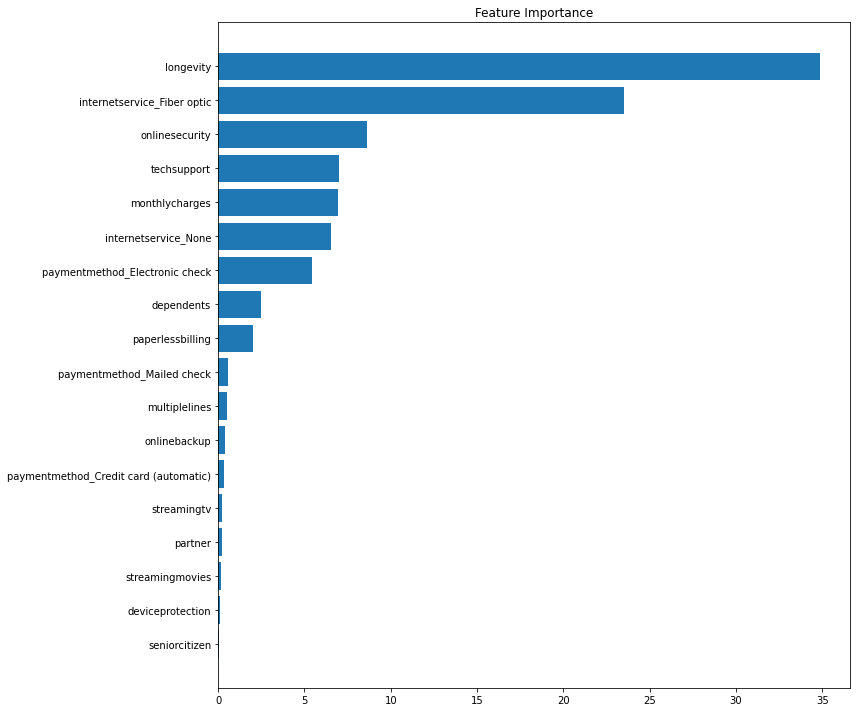

In [247]:
# Plotting feature importance of Catboost Model

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), (X_test.columns)[sorted_idx])
plt.title('Feature Importance')

We can see from CatBoost feature importance plot that the features that contribute most to predicting churn: longevity, monthlycharges, internet service, techsupport, paymentmethod, onlinesecurity, onlinebackup, and dependents.

## Model Sanity Check <a class="anchor" id="section_1_1"></a>

We will use a confusion Matrix to see if our model is really efficient at predicting the positive class. We will interpret the results.

In [248]:
target_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

0.7601135557132718

In [249]:
# Calculating a confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, target_pred)

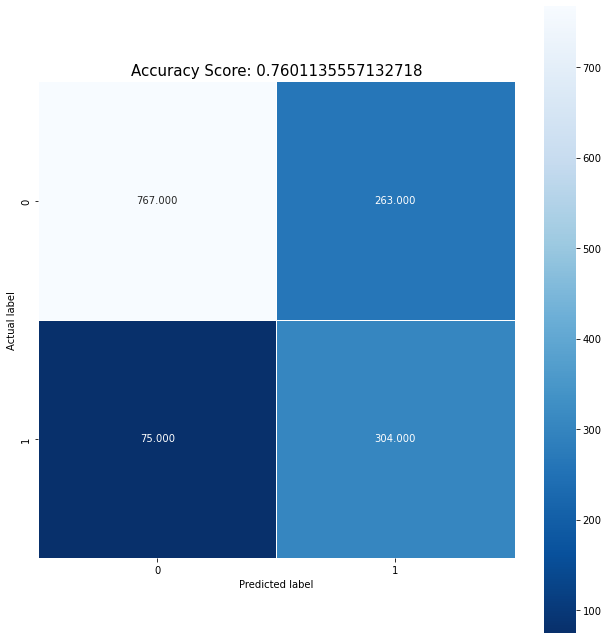

In [250]:
 # Plotting a confusion matrix
 
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

According to the confusion matrix, the model is predicting both classes and has a precision and recall rate that indicates the model performs better than random. The model correctly predicted churn and no_churn the majority of the time. It looks like the model is slightly favoring the minority class. In this data, it should not be problematic for the company to inaccurately flag customers as churn candidates and offer them incentives to remain, so it is preferable for our model to be better at identifying churn customers even if it is also inaccurately identifying non_churn customers as churn customers.

## General Conclusion <a class="anchor" id="chapter1"></a>

Our best perfoming model was the CatBoostClassifier model with an AUC-ROC score of 0.84 and an F1 score of 0.64.

We can see from the CatBoost feature importance plot the features that contribute most to predicting churn: longevity, monthlycharges, techsupport, paymentmethod, onlinesecurity, and internetservice.

Based on our exploratory data analysis and Catboost's feature importance plot, we identified several factors that might lead to a customer to cancel the service:

Customers who cancelled were fairly new customers or customers with a lower longevity.  They averaged less than a 10 month longevity compared to customers who remained, who averaged around a 40 month longevity. Churn was moderately negatively correlated with longevity (-0.36), so that the longer a customer remains, the less likely the customer was to churn. Customers who churned had a higher percentage of month-to-month contracts, 88%, compared to no_churn customers where 43% had month-to-month contracts. This indicates that customers who signed up for contracts of a longer duration were less likely to churn.

Customers who had a higher monthly fee were more likely to leave. In addition, customers who paid by electronic check were more likely to leave than those who paid by mail check, credit card or bank transfer. It is unclear why electronic check would be associated with churn. It is possible that customers who paid by electronic check did not have an automatic payment and so they saw their invoice each month, which may have motivated them to churn.

Also internet service was found to be an important feature in predicting churn. It is worthwhile to explore if churn based on internet serivce was due to the high cost of the service or poor service quality.

Other factors that may be associated with churn and need further exploration are techsupport, onlinesecurity, onlinebackup, and dependents.

Suggestions to the company to prevent churn:

The company might offer a financial incentive to sign up for an annual or multi-annual contract instead of monthly. A customer who is signed up for 12 months or longer has a greater likelihood of remaining. For example, customers could receive a 20% discount to sign up for an annual contract.

Also, is possible that if the payments were automatic then month-to-month customers would not think monthly about their monthly fee and would retain the service. Therefore, the company might offer financial incentives to get automatic payments. For example, offer a discount for customers to transfer to an automatic payment plan.

In addition, the company could temporarily offer a lower fee for more expensive services such as internet services so that customers would get used to them and be willing to pay the higher fee once the temporary low fee period has ended. 